In [2]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, MinMaxScaler
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import mglearn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

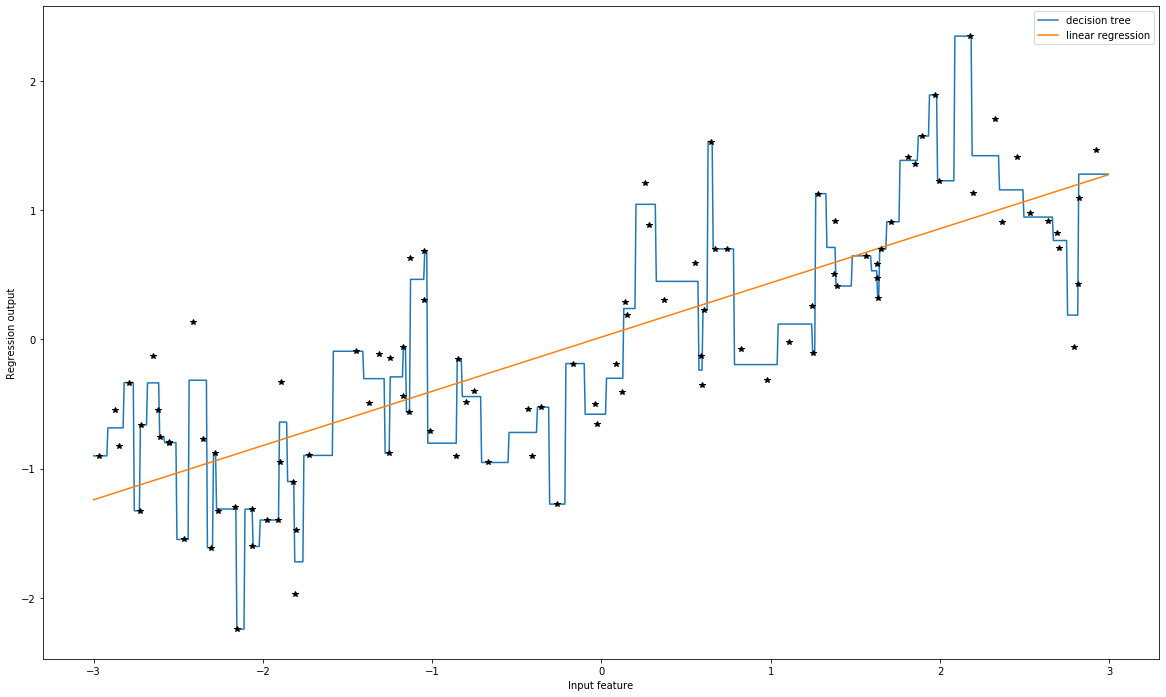

In [3]:
X, y = mglearn.datasets.make_wave(n_samples=100)
line = np.linspace(-3, 3, 1000, endpoint=False).reshape(-1, 1)
plt.figure(figsize=(20, 12))

tree = DecisionTreeRegressor(min_samples_split=3).fit(X, y)
plt.plot(line, tree.predict(line), label='decision tree')

linreg = LinearRegression().fit(X, y)
plt.plot(line, linreg.predict(line), label='linear regression')

plt.plot(X[:, 0], y, '*', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [4]:
# Binning (discretization) of feature -- > split it in multiple features -->
# --> make linear models more powerful on continuous data
bins = np.linspace(-3, 3, 11)
print('bins: {}'.format(bins))

bins: [-3.  -2.4 -1.8 -1.2 -0.6  0.   0.6  1.2  1.8  2.4  3. ]


In [5]:
which_bin = np.digitize(X, bins=bins)
print('First bins memberships:')
for n in range(5):
    print(bins[which_bin[n] - 1], '<=', X[n], '<', bins[which_bin[n]])

First bins memberships:
[-1.2] <= [-0.75275929] < [-0.6]
[2.4] <= [2.70428584] < [3.]
[1.2] <= [1.39196365] < [1.8]
[0.] <= [0.59195091] < [0.6]
[-2.4] <= [-2.06388816] < [-1.8]


In [6]:
# single continuous input feature --> categorical feature (which bin a data point is in)

encoder = OneHotEncoder(sparse=False, categories='auto')
encoder.fit(which_bin)
X_binned = encoder.transform(which_bin)
print(X_binned[:5])
print('X_binned.shape: {}'.format(X_binned.shape))

[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
X_binned.shape: (100, 10)


Text(0.5, 0, 'Input feature')

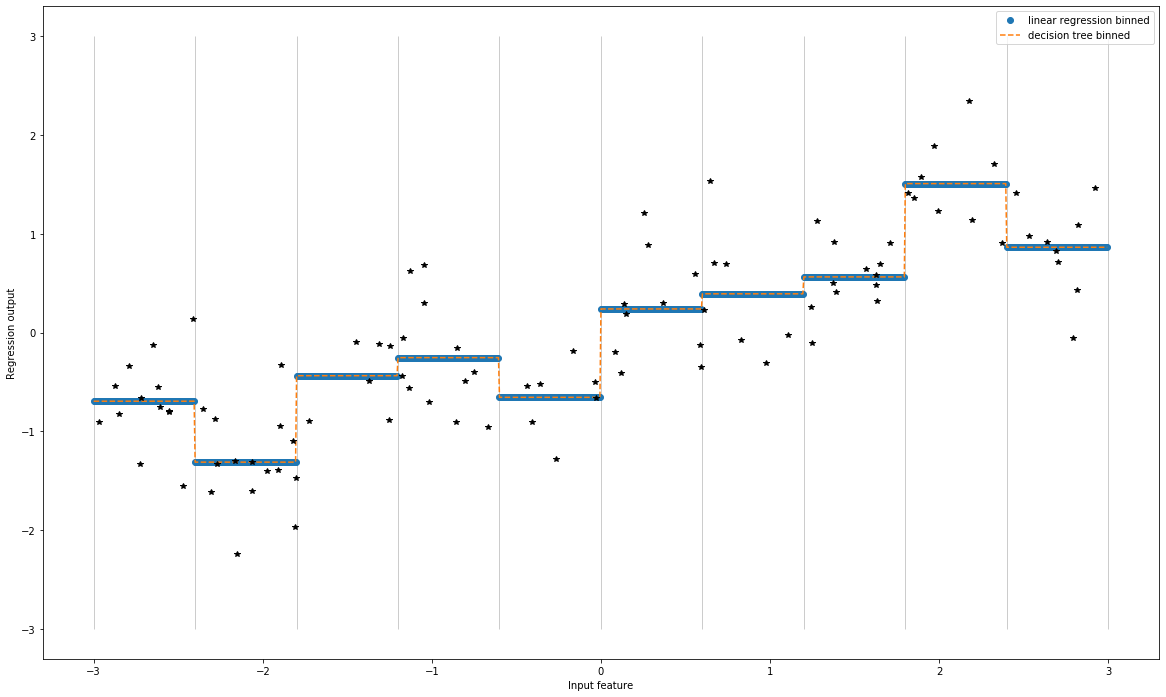

In [7]:
line_binned = encoder.transform(np.digitize(line, bins=bins))
plt.figure(figsize=(20, 12))

linreg = LinearRegression().fit(X_binned, y)
plt.plot(line, linreg.predict(line_binned), 'o', label='linear regression binned')

tree = DecisionTreeRegressor(min_samples_split=3).fit(X_binned, y)
plt.plot(line, tree.predict(line_binned), '--',label='decision tree binned')

plt.plot(X[:, 0], y, '*', c='k')
plt.vlines(bins, -3, 3, linewidth=1, alpha=.2)
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')

# Linear model --> more flexible

### Polynomial terms

(100, 11)


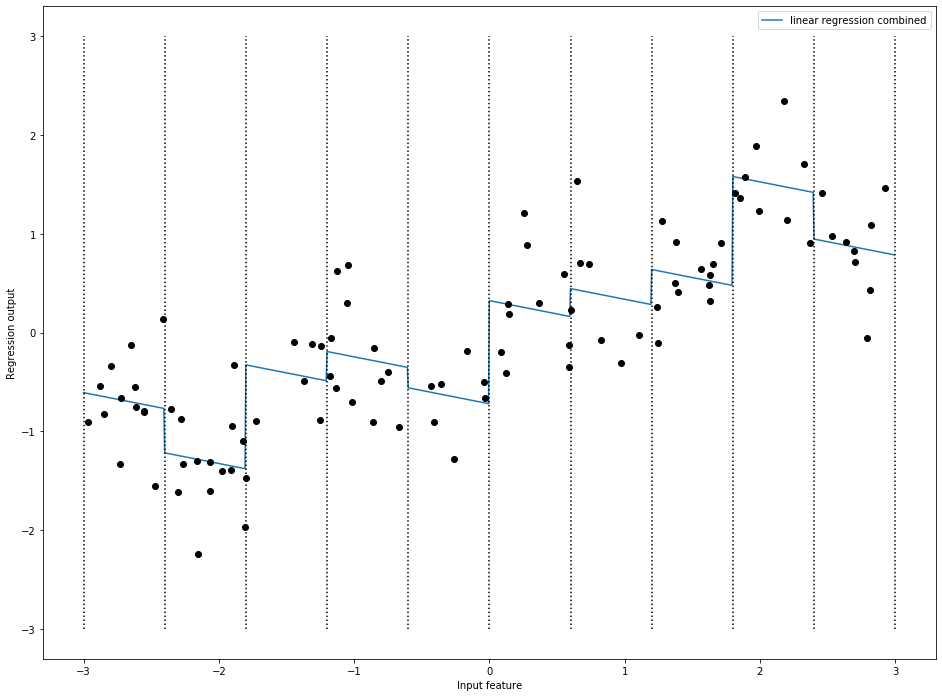

In [8]:
X_combined = np.hstack([X, X_binned])
print(X_combined.shape)

linreg = LinearRegression().fit(X_combined, y)

line_combined = np.hstack([line, line_binned])
plt.figure(figsize=(16, 12))
plt.plot(line, linreg.predict(line_combined), label='linear regression combined')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
    
plt.legend(loc='best')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.plot(X[:, 0], y, 'o', c='k')

# the same slope on each bin

In [9]:
# X*X_binned - which bin a data point is in and where it lies on the x-axis

X_product = np.hstack([X_binned, X*X_binned])
print(X_product.shape)
display(pd.DataFrame(X_product).head())

(100, 20)


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.000000,-0.0,-0.752759,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.000000
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,2.704286
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,1.391964,0.0,0.000000
3,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,0.591951,0.0,0.000000,0.0,0.000000
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-2.063888,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.000000,-0.0,-0.000000


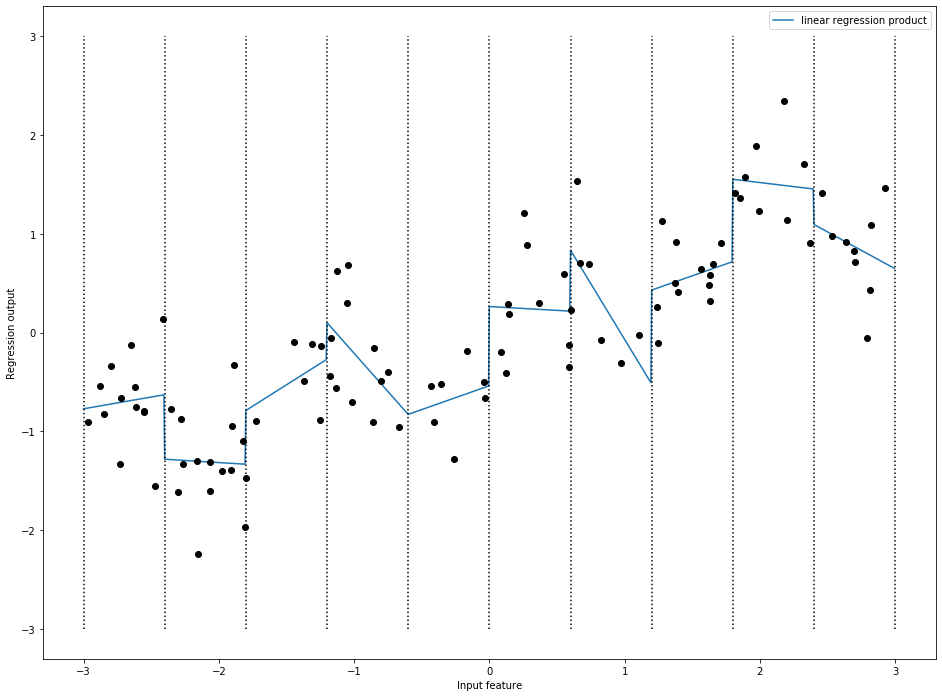

In [10]:
linreg = LinearRegression().fit(X_product, y)

line_product = np.hstack([line_binned, line*line_binned])
plt.figure(figsize=(16, 12))
plt.plot(line, linreg.predict(line_product), label='linear regression product')

for bin in bins:
    plt.plot([bin, bin], [-3, 3], ':', c='k')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

# separate slope on each bin

In [11]:
poly = PolynomialFeatures(degree=10, include_bias=False)
poly.fit(X)
X_poly = poly.transform(X)
print(X_poly.shape)
display(pd.DataFrame(X_poly).head())
print(poly.get_feature_names())

(100, 10)


,0,1,2,3,4,5,6,7,8,9
0,-0.752759,0.566647,-0.426548,0.321088,-0.241702,0.181944,-0.136960,0.103098,-0.077608,0.058420
1,2.704286,7.313162,19.776880,53.482337,144.631526,391.124988,1057.713767,2860.360362,7735.232021,20918.278410
2,1.391964,1.937563,2.697017,3.754150,5.225640,7.273901,10.125005,14.093639,19.617834,27.307312
3,0.591951,0.350406,0.207423,0.122784,0.072682,0.043024,0.025468,0.015076,0.008924,0.005283
4,-2.063888,4.259634,-8.791409,18.144485,-37.448187,77.288869,-159.515582,329.222321,-679.478050,1402.366700


['x0', 'x0^2', 'x0^3', 'x0^4', 'x0^5', 'x0^6', 'x0^7', 'x0^8', 'x0^9', 'x0^10']


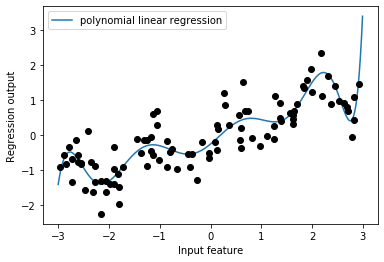

In [12]:
# Polynomial regression

pol_reg = LinearRegression().fit(X_poly, y)
line_poly = poly.transform(line)
plt.plot(line, pol_reg.predict(line_poly), label='polynomial linear regression')
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

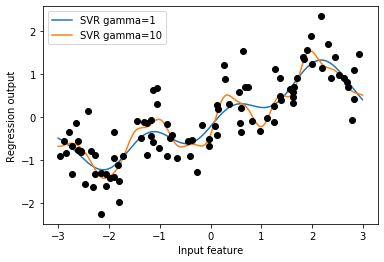

In [13]:
# Complex model without polynomial terms
for gamma in [1, 10]:
    svr = SVR(gamma=gamma).fit(X, y)
    plt.plot(line, svr.predict(line), label='SVR gamma={}'.format(gamma))
    
plt.plot(X[:, 0], y, 'o', c='k')
plt.ylabel('Regression output')
plt.xlabel('Input feature')
plt.legend(loc='best')

In [14]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, random_state=42)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [15]:
poly = PolynomialFeatures(degree=2)
poly.fit(X_train_scaled)
X_train_poly = poly.transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)
print(poly, '\n')
print('Interaction features (shape): {}\n'.format(X_train_poly.shape))
print('Original features (shape): {}\n'.format(X_train_scaled.shape))
print('Poly feature names: {}'.format(poly.get_feature_names()))

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C') 

Interaction features (shape): (379, 105)

Original features (shape): (379, 13)

Poly feature names: ['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x0 x4', 'x0 x5', 'x0 x6', 'x0 x7', 'x0 x8', 'x0 x9', 'x0 x10', 'x0 x11', 'x0 x12', 'x1^2', 'x1 x2', 'x1 x3', 'x1 x4', 'x1 x5', 'x1 x6', 'x1 x7', 'x1 x8', 'x1 x9', 'x1 x10', 'x1 x11', 'x1 x12', 'x2^2', 'x2 x3', 'x2 x4', 'x2 x5', 'x2 x6', 'x2 x7', 'x2 x8', 'x2 x9', 'x2 x10', 'x2 x11', 'x2 x12', 'x3^2', 'x3 x4', 'x3 x5', 'x3 x6', 'x3 x7', 'x3 x8', 'x3 x9', 'x3 x10', 'x3 x11', 'x3 x12', 'x4^2', 'x4 x5', 'x4 x6', 'x4 x7', 'x4 x8', 'x4 x9', 'x4 x10', 'x4 x11', 'x4 x12', 'x5^2', 'x5 x6', 'x5 x7', 'x5 x8', 'x5 x9', 'x5 x10', 'x5 x11', 'x5 x12', 'x6^2', 'x6 x7', 'x6 x8', 'x6 x9', 'x6 x10', 'x6 x11', 'x6 x12', 'x7^2', 'x7 x8', 'x7 x9', 'x7 x10', 'x7 x11', 'x7 x12', 'x8^2', '

In [16]:
# Compare Ridge Regression performance with|without poly features

ridge = Ridge().fit(X_train_scaled, y_train)
print('Score without interactions: {:.3f}'.format(ridge.score(X_test_scaled, y_test)))

ridge_pol = Ridge().fit(X_train_poly, y_train)
print('Score with poly features: {:.3f}'.format(ridge_pol.score(X_test_poly, y_test)))

Score without interactions: 0.692
Score with poly features: 0.816


In [17]:
# Compare Random Forest performance with|without poly features

rf = RandomForestRegressor(n_estimators=100).fit(X_train_scaled, y_train)
print('Score without poly features: {:.3f}'.format(rf.score(X_test_scaled, y_test)))

rf_pol = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print('Score with poly features: {:.3f}'.format(rf_pol.score(X_test_poly, y_test)))

# Higher than Ridge even without poly features

Score without poly features: 0.843
Score with poly features: 0.860
